# PROJECT 1

In [ ]:
# Import necessary libraries
import random
import csv
from datetime import datetime, timedelta
import pandas as pd  # Optional, useful for viewing the CSV data in Colab

In [ ]:
# Attributes for candy scoops
FLAVORS = ["strawberry", "blueberry", "orange", "apple", "grape"]
SHAPES = ["worms", "bears", "rings", "hearts", "sharks"]
COATING = ["sugared", "sour"]


In [ ]:
# Helper function: Generate random dates in 2024
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))


In [ ]:
# Product class
class Product:
    def __init__(self, flavor, shape, coating, price):
        self.name = f"{flavor} {shape} ({coating})"
        self.price = price


In [ ]:
# Order class
class Order:
    def __init__(self, order_id, customer_id):
        self.order_id = order_id
        self.customer_id = customer_id
        self.products = []  # List of Product instances

    def add_product(self, product, quantity):
        self.products.append((product, quantity))

In [ ]:
# Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []  # List of Order instances

    def place_order(self, order):
        self.orders.append(order)

In [ ]:
# Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}  # Dictionary of Customer instances by customer_id

    def get_or_create_customer(self, customer_id):
        if customer_id not in self.customers:
            self.customers[customer_id] = Customer(customer_id)
        return self.customers[customer_id]


In [ ]:
import random
import pandas as pd
from datetime import datetime, timedelta

# Helper function: Generate random datetime in 2024
def random_datetime(start, end):
    random_seconds = random.randint(0, int((end - start).total_seconds()))
    return start + timedelta(seconds=random_seconds)

# Attributes for candy scoops
FLAVORS = ["strawberry", "blueberry", "orange", "apple", "grape"]
SHAPES = ["worms", "bears", "rings", "hearts", "sharks"]
COATING = ["sugared", "sour"]

# Product class
class Product:
    def __init__(self, flavor, shape, coating, price):
        self.name = f"{flavor} {shape} ({coating})"
        self.price = price

# Order class
class Order:
    def __init__(self, order_id, customer_id):
        self.order_id = order_id
        self.customer_id = customer_id
        self.products = []  # List of Product instances

    def add_product(self, product, quantity):
        self.products.append((product, quantity))

# Customer class
class Customer:
    def __init__(self, customer_id):
        self.customer_id = customer_id
        self.orders = []  # List of Order instances

    def place_order(self, order):
        self.orders.append(order)

# Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}  # Dictionary of Customer instances by customer_id

    def get_or_create_customer(self, customer_id):
        if customer_id not in self.customers:
            self.customers[customer_id] = Customer(customer_id)
        return self.customers[customer_id]

# Corporation class
class Corporation:
    def __init__(self):
        self.stores = {}  # Dictionary of Store instances by store_id
        self.sales_data = []  # List to store sales data for CSV

    def get_or_create_store(self, store_id):
        if store_id not in self.stores:
            self.stores[store_id] = Store(store_id)
        return self.stores[store_id]

    def record_sale(self, date, time, store_id, customer_id, order_id, product_name, price, quantity):
        """Records a single sale in the sales_data list."""
        self.sales_data.append([
            date, time, store_id, customer_id, order_id, product_name, price, quantity
        ])

    def generate_sales_data(self, num_transactions=100000, num_stores=2500, customers_per_store=1000):
        """Generates sales data for the specified number of transactions."""
        start_date = datetime(2024, 1, 1)
        end_date = datetime(2024, 12, 31)

        for _ in range(num_transactions):
            # Randomly choose store and customer
            store_id = random.randint(1, num_stores)
            store = self.get_or_create_store(store_id)
            customer_id = f"CUST_{store_id}_{random.randint(1, customers_per_store)}"
            customer = store.get_or_create_customer(customer_id)
            order_id = f"{store_id}_{random.randint(10000, 99999)}"
            order = Order(order_id, customer_id)

            # Generate random date and time for purchase
            purchase_datetime = random_datetime(start_date, end_date)

            # Add random products to the order
            num_products = random.randint(1, 5)  # 1-5 products per order
            for _ in range(num_products):
                product = Product(
                    flavor=random.choice(FLAVORS),
                    shape=random.choice(SHAPES),
                    coating=random.choice(COATING),
                    price=round(random.uniform(1, 10), 2)
                )
                quantity = random.randint(1, 10)
                order.add_product(product, quantity)

                # Record the sale in the sales data
                self.record_sale(
                    purchase_datetime.date(),
                    purchase_datetime.time(),
                    store_id,
                    customer_id,
                    order_id,
                    product.name,
                    product.price,
                    quantity
                )
            customer.place_order(order)

    def save_to_csv(self, filename="candy_sales_2024.csv"):
        """Saves the sales data to a CSV file."""
        df = pd.DataFrame(self.sales_data, columns=[
            "Date", "Time", "StoreID", "CustomerID", "OrderID", "ProductName", "Price", "Quantity"
        ])
        df.to_csv(filename, index=False)
        print(f"Sales data saved to {filename}")

# Instantiate Corporation
corp = Corporation()

# Generate sales data for 100,000 transactions
corp.generate_sales_data(num_transactions=100000)

# Save the updated data to a CSV file
corp.save_to_csv("candy_sales_2024.csv")


Sales data saved to candy_sales_2024.csv


In [ ]:
# Instantiate the Corporation
corp = Corporation()

# Generate sales data for 100,000 transactions
corp.generate_sales_data(num_transactions=100000)

# Save the updated data to a CSV file
corp.save_to_csv("candy_sales_2024.csv")

Sales data saved to candy_sales_2024.csv


In [ ]:
df = pd.read_csv("candy_sales_2024.csv")
df.head()

,Date,Time,StoreID,CustomerID,OrderID,ProductName,Price,Quantity
0,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,blueberry sharks (sour),5.86,3
1,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,apple rings (sour),2.77,10
2,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,orange sharks (sugared),9.39,5
3,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,orange bears (sour),9.39,3
4,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,apple sharks (sugared),3.19,5


In [51]:
!jupyter nbconvert --to pdf CandyStore.ipynb

[NbConvertApp] Converting notebook CandyStore.ipynb to pdf
[NbConvertApp] Writing 43039 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 39216 bytes to CandyStore.pdf


# PROJECT 2

In [52]:
import pandas as pd

# Load the sales data CSV file from Project 1
sales_data = pd.read_csv('candy_sales_2024.csv')

# Show the first few rows of the data to verify
sales_data.head()

,Date,Time,StoreID,CustomerID,OrderID,ProductName,Price,Quantity
0,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,blueberry sharks (sour),5.86,3
1,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,apple rings (sour),2.77,10
2,2024-07-07,16:43:21,1474,CUST_1474_99,1474_42898,orange sharks (sugared),9.39,5
3,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,orange bears (sour),9.39,3
4,2024-01-20,20:04:47,1663,CUST_1663_62,1663_83042,apple sharks (sugared),3.19,5


In [56]:
# Check for missing values
sales_data.isnull().sum()

# Get basic summary statistics
sales_data.describe()

,StoreID,Price,Quantity
count,299961.000000,299961.000000,299961.000000
mean,1254.578015,5.497832,5.500675
std,722.759292,2.597153,2.864813
min,1.000000,1.000000,1.000000
25%,628.000000,3.250000,3.000000
50%,1257.000000,5.490000,5.000000
75%,1881.000000,7.750000,8.000000
max,2500.000000,10.000000,10.000000


In [68]:
#1# The most prevalent products, in customer baskets

most_prevalent_products = sales_data.groupby('ProductName').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

most_prevalent_products.head()  # Display top 5 most prevalent products


,Quantity
ProductName,
apple rings (sugared),33668
blueberry bears (sugared),33661
grape rings (sugared),33638
grape bears (sour),33628
grape hearts (sugared),33605


In [69]:
#2# The frequency by which customers were large buyers, or filled up large baskets

large_basket_customers = sales_data.groupby('CustomerID').agg({
    'Quantity': 'sum'
})
large_basket_customers = large_basket_customers[large_basket_customers['Quantity'] > 50]  # Arbitrary threshold for large basket

large_basket_customers.head()

,Quantity
CustomerID,
CUST_1004_246,54
CUST_1031_725,56
CUST_1043_167,60
CUST_1047_358,57
CUST_1054_408,51


In [70]:
#3# Which stores contained the large-basket buyers, and by how much

large_basket_by_store = sales_data[sales_data['CustomerID'].isin(large_basket_customers.index)]
large_basket_by_store = large_basket_by_store.groupby('StoreID').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

large_basket_by_store.head()


,Quantity
StoreID,
2185,118
1962,115
276,115
86,107
125,81


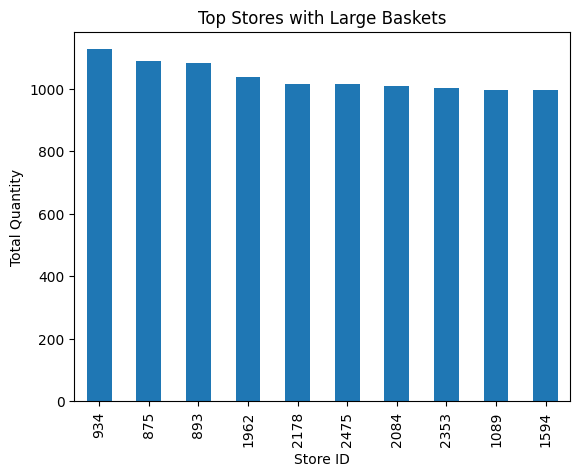

In [71]:
#4# A visualization that ranks the top, large-basket customer stores, by frequency

# Group by StoreID and sum the quantity of products bought in each store
large_basket_by_store = sales_data.groupby('StoreID').agg({'Quantity': 'sum'}).reset_index()

# Now, sort by quantity and take the top 10 stores
large_basket_by_store_sorted = large_basket_by_store.sort_values(by='Quantity', ascending=False).head(10)

# Plot the data
import matplotlib.pyplot as plt

large_basket_by_store_sorted.plot(kind='bar', x='StoreID', y='Quantity', legend=False)
plt.title("Top Stores with Large Baskets")
plt.xlabel('Store ID')
plt.ylabel('Total Quantity')
plt.show()


In [72]:
#5# A top-n list of products, which were typical to customers in this demographic

large_basket_products = sales_data[sales_data['CustomerID'].isin(large_basket_customers.index)]
top_large_basket_products = large_basket_products.groupby('ProductName').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

top_large_basket_products.head()


,Quantity
ProductName,
strawberry hearts (sugared),319
apple rings (sugared),314
grape worms (sugared),314
blueberry hearts (sour),302
blueberry sharks (sour),302


In [73]:
#6# A categorical approach to the above demographic – what is the categoric makeup of their baskets, on average?

large_basket_products['Flavors'] = large_basket_products['ProductName'].apply(lambda x: x.split()[0])  # Assumes flavor is first word in product name
flavor_distribution = large_basket_products.groupby('Flavors').agg({
    'Quantity': 'sum'
}).sort_values(by='Quantity', ascending=False)

flavor_distribution.head()


<ipython-input-73-0fe20fcdf9db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_basket_products['Flavors'] = large_basket_products['ProductName'].apply(lambda x: x.split()[0])  # Assumes flavor is first word in product name


,Quantity
Flavors,
apple,2413
orange,2406
strawberry,2377
grape,2364
blueberry,2232


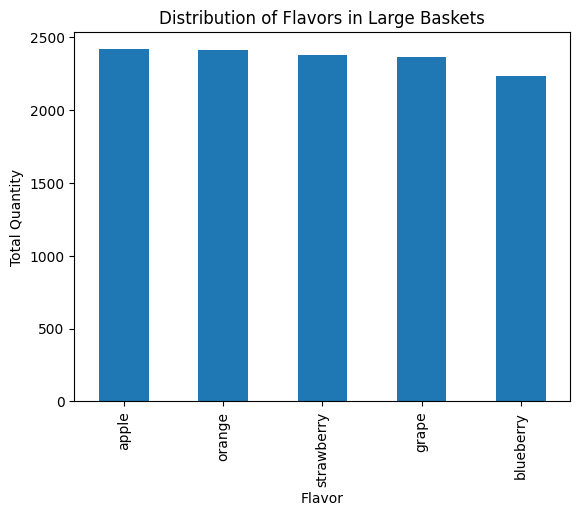

In [74]:
#7# Formulate a visualization for item 6, above

flavor_distribution.plot(kind='bar', y='Quantity', legend=False)
plt.title("Distribution of Flavors in Large Baskets")
plt.xlabel('Flavor')
plt.ylabel('Total Quantity')
plt.show()


# PROJECT 3